In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
%load_ext cython

In [33]:
%%cython
cimport cython
import numpy as np
cimport numpy as np
np.import_array()
#@cython.boundscheck(False) #unstable, causes random kernel crashes
#@cython.wraparound(False)  # Same, probably 
def zipperc( double[:,:] A , double[:] b, int N , int sol0 , int solN):
    
    sol = np.zeros(N, dtype = np.double)
    cdef double[:] sol_view = sol
    sol_view[0] = sol0
    sol_view[N-1] = solN
    alpha = np.zeros(N-1, dtype = np.double)
    cdef double[:] alpha_view = alpha
    beta = np.zeros(N-1, dtype = np.double)
    cdef double[:] beta_view = beta
    cdef double c
    
    cdef np.npy_intp i,j
    alpha_view[N-2] = 0.0
    beta_view[N-2] = solN 
    for i in range(2,N+1):
        c = -1/(A[N-i,N-i]+ alpha_view[N-i] * A[N-(i+1),N-i] )
        beta_view[N-(i+1)] = c*(A[N-(i+1),N-i]*beta_view[N-i]-b[N-i])
        alpha_view[N-(i+1)] = c*A[N-(i-1),N-i]
    for j in range(0,N-2):
        sol_view[j+1] = alpha_view[j]*sol_view[j]+beta_view[j]
    return sol

In [4]:
def norm( array ):
    N = np.sqrt( 1/(dx*np.sum( array**2)) )
    array *= N


Nx = 1000
Nt = 1000
x = np.linspace(-10,10,Nx)
dx = x[1] - x[0]
t = np.linspace(0,1000,Nt)
dt= t[1] - t[0]
sol = np.ones((Nt,Nx), dtype = np.double)
#sol[0] = np.exp(-(x-4)**2) + np.exp(-(x+4)**2) # gaussian at t=0
#sol[0] = x*np.exp(-x**2)
sol[0] = np.random.rand(Nx)
sol[:,0] = 0
sol[:,-1] = 0
norm(sol[0])
#source = np.zeros(Nx,dtype = np.double)
V = 0.5*x**2
#V = np.zeros(Nx)
A = -np.diag(V) + np.diag(np.ones(Nx,dtype = np.double))*(1 - dt/dx**2) + np.diag(np.ones(Nx-1,dtype = np.double),1)*(+1*dt/(2*dx**2)) +  np.diag(np.ones(Nx-1,dtype = np.double),-1)*(+1*dt/(2*dx**2))
energy = np.zeros(  Nt, dtype = np.double)

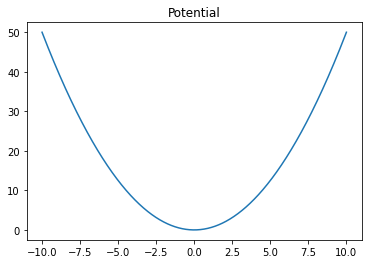

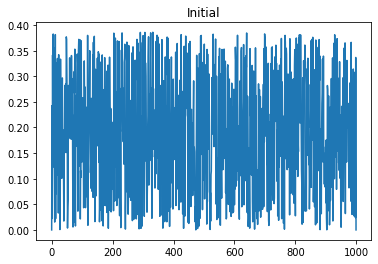

In [5]:
plt.plot(x,V)
plt.title("Potential")
plt.show()
plt.plot(sol[0])
plt.title("Initial")
plt.show()


In [6]:
for i in range(Nt-1):
    sol[i+1] = zipperc(A, sol[i],Nx,0,0)
    norm(sol[i+1])
    energy[i] = dx*np.sum( 0.5*(1/dx**2)*(sol[i+1,1:] - sol[i+1,:-1])**2  + V[1:]*sol[i+1,1:]**2)
    
print("DONE")

DONE


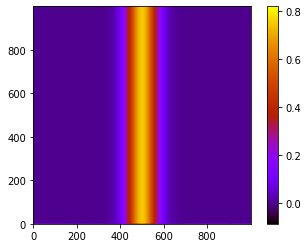

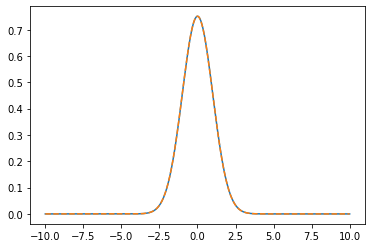

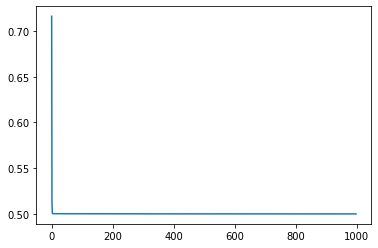

0.4999938085366509


In [7]:
plt.imshow(sol[::max(int(Nt/Nx),1)],cmap ='gnuplot',origin = 'lower')
plt.colorbar()
plt.show()
plt.plot(x,sol[-1])
plt.plot(x, (1/(np.pi))**(1/4) * np.exp(-(x**2)/2),'--'  )
#plt.xlim(-100,100)
#plt.plot(x, np.sqrt(2)*np.sin(np.pi*x),'--')
plt.show()
plt.plot(np.arange(Nt-1),energy[0:-1])
plt.show()

print(energy[-2])

In [37]:
def border3d( A, n):
    A[0,:,:] = n
    A[-1,:,:] = n
    A[:,0,:] = n
    A[:,-1,:] = n
    A[:,:,0] = n
    A[:,:,-1] = n
    
Nx = 100
Ny = 100
Nz = 100
Nt = 20
x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Ny)
z = np.linspace(-5,5,Nz)
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]
X,Y,Z = np.meshgrid(x,y,z)
t = np.linspace(0,100,Nt)
dt= t[1] - t[0]
#sol = np.ones((Nx,Ny,Nz), dtype = np.double)
sol = np.random.rand(Nx,Ny,Nz)
border3d(sol, 0)
newsol = np.copy(sol)
#sol[0] = np.exp(-(x-4)**2) + np.exp(-(x+4)**2) # gaussian at t=0
#sol[0] = x*np.exp(-x**2)


    
V = -1/(np.sqrt(X**2 + Y**2 + Z**2))
#A = -np.diag(V[:,:,0]) + np.diag(np.ones(Nx,dtype = np.double))*(1 - dt/dx**2) + np.diag(np.ones(Nx-1,dtype = np.double),1)*(+1*dt/(2*dx**2)) +  np.diag(np.ones(Nx-1,dtype = np.double),-1)*(+1*dt/(2*dx**2))
#energy = np.zeros(  Nt, dtype = np.double)

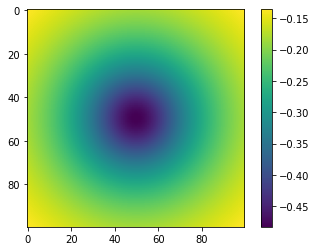

In [38]:
plt.imshow(V[70])
plt.colorbar()
plt.show()

In [39]:
for n in range(Nt-1):
    for i1 in range(Nx):
        for i2 in range(Nx):
            A = -np.diag(V[:,i1,i2]) + np.diag(np.ones(Nx,dtype = np.double))*(1 - dt/dx**2) + np.diag(np.ones(Nx-1,dtype = np.double),1)*(+1*dt/(2*dx**2)) +  np.diag(np.ones(Nx-1,dtype = np.double),-1)*(+1*dt/(2*dx**2))
            newsol[:,i1,i2] = zipperc(A,sol[:,i1,i2],Nx,0,0)
    for j1 in range(Ny):
        for j2 in range(Ny):
            A = -np.diag(V[j1,j2,:]) + np.diag(np.ones(Nx,dtype = np.double))*(1 - dt/dx**2) + np.diag(np.ones(Nx-1,dtype = np.double),1)*(+1*dt/(2*dx**2)) +  np.diag(np.ones(Nx-1,dtype = np.double),-1)*(+1*dt/(2*dx**2))
            newsol[j1,j2,:] = zipperc(A,newsol[j1,j2,:],Ny,0,0)
    for k1 in range(Nz):
        for k2 in range(Nz):
            A = -np.diag(V[k1,:,k2]) + np.diag(np.ones(Nx,dtype = np.double))*(1 - dt/dx**2) + np.diag(np.ones(Nx-1,dtype = np.double),1)*(+1*dt/(2*dx**2)) +  np.diag(np.ones(Nx-1,dtype = np.double),-1)*(+1*dt/(2*dx**2))
            newsol[k1,:,k2] = zipperc(A,newsol[k1,:,k2],Nz,0,0)
    np.copyto(sol,newsol)

In [43]:
#V = -1/(np.sqrt(X**2 + Y**2 + Z**2))
def norm( array ):
    N = np.sqrt( 1/(dx*dy*dz*np.sum( array**2)) )
    array *= N
norm(newsol)
def energy(array): 
    return dx*dy*dz*np.sum( 0.5*(1/dx**2)*(array[1:,1:,1:] - array[:-1,1:,1:])**2 + 0.5*(1/dy**2)*(array[1:,1:,1:] - array[1:,:-1,1:])**2 + 0.5*(1/dz**2)*(array[1:,1:,1:] - array[1:,1:,:-1])**2 + V[1:,1:,1:]*array[1:,1:,1:]**2)
energy(newsol)

0.4331399681756446

In [45]:
hydrogen = 1/np.sqrt(np.pi) * np.exp(-1*(np.sqrt(X**2 +Y**2 + Z**2)))
np.sum(np.abs(hydrogen - newsol))/(Nx*Ny*Nz)

0.030139195774741976